# Machine Learning Indonesian.AI
Pertemuan - 4 Linear & Logistic Regression

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

In [4]:
df = pd.read_csv('salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape

(30, 2)

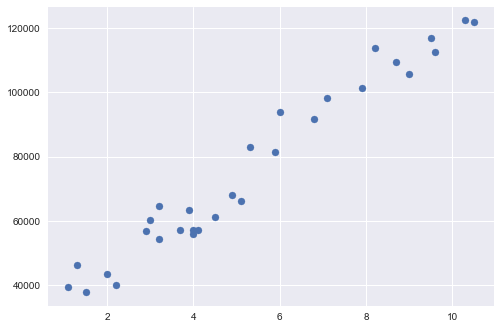

In [6]:
plt.scatter(data=df,x='YearsExperience',y='Salary')
plt.show()

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Split data
Membagi data menjadi 80% dan 20%

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
# with split feature

# x = df.drop('Salary', axis=1)
# y = df['Salary']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=12)

# print(f'total x_train : {x_train.shape[0]}')
# print(f'total x_test : {x_test.shape[0]}')
# print(f'total y_train : {y_train.shape[0]}')
# print(f'total y_test : {y_test.shape[0]}\n')


# without split feature

train_data, test_data = train_test_split(df, test_size=.2, random_state=12)

print(f'total data train : {train_data.shape[0]}')
print(f'total data test : {test_data.shape[0]}')

total data train : 24
total data test : 6


In [19]:
train_data.head()

,YearsExperience,Salary
4,2.2,39891.0
15,4.9,67938.0
23,8.2,113812.0
9,3.7,57189.0
20,6.8,91738.0


In [20]:
# split feature

train_label = train_data['Salary']
train_feature = train_data.drop('Salary', axis =1)

test_label = test_data['Salary']
test_feature = test_data.drop('Salary', axis =1)

In [23]:
train_feature.head()

,YearsExperience
4,2.2
15,4.9
23,8.2
9,3.7
20,6.8


## Train Model With Linear Regression

Underfitting
* Train acc <<
* Test acc >>

Overfitting
* Train acc >>
* Test acc <<

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X=train_feature, y=train_label)

LinearRegression()

## Test Model

In [42]:
from sklearn.metrics import r2_score

accuracy_score = lr.score(test_feature, test_label) # same as r2_score(test_label, salary_pred)
print(f'Accuracy Score: {accuracy_score * 100:.2f}')

Accuracy Score: 94.29


In [30]:
salary_pred = lr.predict(test_feature) 
salary_pred

array([ 55675.5913984 , 100372.57413579,  81352.58148158,  68038.58662364,
        37606.59837691,  92764.5770741 ])

### Visualisasi

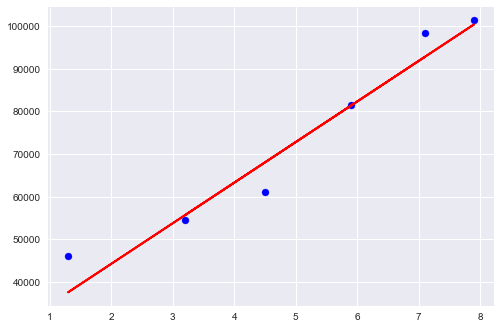

In [41]:
plt.scatter(x=test_data['YearsExperience'], y= test_data['Salary'], color='blue')
plt.plot(test_data['YearsExperience'], salary_pred, color='red', linewidth=2)
plt.show()

In [43]:
print('Coefficient:', lr.coef_[0])
print('Intercept:', lr.intercept_) # y = 9509.996327102479X + 25243.60315167621

Coefficient: 9509.996327102475
Intercept: 25243.603151676223


### Mean Absolute Error (MAE)

In [44]:
from sklearn.metrics import mean_absolute_error
print(f'MAE :{mean_absolute_error(test_label,salary_pred)}')

MAE: 3867.4744922769446


### Mean Squared Error (MSE)

In [45]:
from sklearn.metrics import mean_squared_error
print(f'MSE :{mean_squared_error(test_label,salary_pred)}')

MSE :25774164.367154535


### Root Mean Squared Error (RMSE)

In [46]:
print(f'RMSE :{np.sqrt(mean_squared_error(test_label,salary_pred))}')

RMSE :5076.8262100602315
